#### Define Meta-Parameters
##### Meta-Parameters

In [186]:
N_Reconfigurations = 10**2
d = 1 # Dimension of X
D = 1 # Dimension of Y

# Data Meta-Parameters
noise_level = 0.1

# Training meta-parameters
Epochs = 10**2

##### Simulation Meta-Parameters

In [187]:
# Number of Datapoints
N_data = 10**3
# Unknown Function
def unknown_f(x):
    return np.sin(x)

#### Generate Data

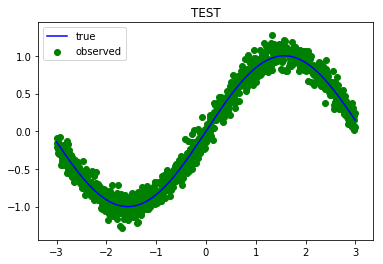

In [188]:
%run Data_Generator.ipynb # Exectute temporary training Parameters

#### Define NEU-OLS

In [189]:
%run NEU_Backend.ipynb

TensorFlow: 2.1.0
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 2)                 0         
_________________________________________________________________
reconfiguration_unit_302 (Re (None, 2)                 10        
_________________________________________________________________
reconfiguration_unit_303 (Re (None, 2)                 10        
_________________________________________________________________
reconfiguration_unit_304 (Re (None, 2)                 10        
_________________________________________________________________
reconfiguration_unit_305 (Re (None, 2)                 10        
_________________________________________________________________
reconfiguration_unit_306 (Re (None, 2)                 10        
_________________________________________________________________
reconfiguration_unit_307 (Re (None, 2)  

### Compile NEU_OLS

In [190]:
NEU_OLS.compile(loss='mse',
                optimizer="SGD",
                metrics=['mae', 'mse'])

### Fit NEU OLS

In [191]:
# Fit 
history = NEU_OLS.fit(
  data_NEU, data_y,
  epochs=Epochs)

Epoch 1/100
1000/1000 [==============================] - 73s 73ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 2/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 3/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 4/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 5/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 6/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 7/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 8/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 

1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 67/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 68/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 69/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 70/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 71/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 72/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 73/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00
Epoch 74/100


In [192]:
NEU_prediction = NEU_OLS.predict(data_NEU)

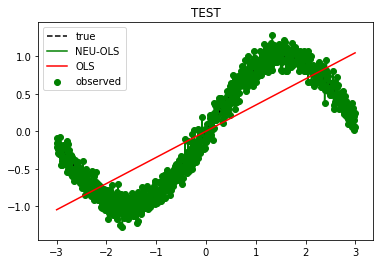

In [193]:
# Plot Models
plt.plot(data_x,true_y,color='k',label='true',linestyle='--')
plt.plot(data_x,NEU_prediction,color='g',label='NEU-OLS')
plt.plot(data_x,model_pred_y,color='r',label='OLS')

# Add Legends
plt.scatter(data_x,data_y,color='g',label='observed')
plt.legend(loc="upper left")
plt.title("TEST")
plt.show()

In [241]:
y_test = tf.constant(data_y.reshape(-1,1))
y_hat_test = tf.constant(data_x)
SEs = tf.pow(y_hat_test-y_test,2)

In [252]:
def keras_custom_loss(y_true,y_predicted):
    SEs = K.backend.pow(y_true-y_predicted,2)
    out_custom = tf.contrib.distributions.percentile(SEs, 50.0)
    return out_custom

In [253]:
# Plot Models
plt.plot(data_x,true_y,color='k',label='true',linestyle='--')
#plt.plot(data_x,NEU_prediction,color='g',label='NEU-OLS')
plt.plot(data_x,f_hat_lowess,color='m',label='Lowess')
#plt.plot(data_x,model_pred_y,color='r',label='OLS')

# Add Legends
plt.scatter(data_x,data_y,color='g',label='observed')
plt.legend(loc="upper left")
plt.title("TEST")
plt.show()

AttributeError: module 'tensorflow' has no attribute 'contrib'